# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

(0, 100)

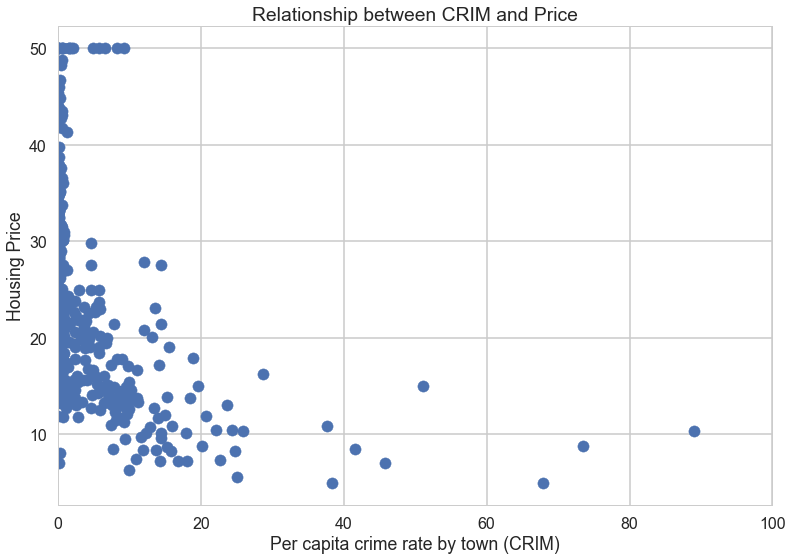

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.xlim(0, 100)

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

<div class="span5 alert alert-success">
<h4>Exercise Set I Solutions</h4>

In general, there is a negative relationship between crime rate and housing price. That is, as crime rate increases, house price decreases. The relationship appears to be linear enough, but the presence of outliers gives the relationship a slight non-linear feel to it. We will analyze the data as if there is a linear relationship first. We can always get more sophisticated later if we run into problems. There seem to be two groups of outliers in crime rate. A group above 60, and a group between 30 and 60. We also notice some floor and ceiling effects and non-constant variance. In neighborhoods with practically no crime, there is a very large variation in housing prices. One explanation may be that there are condos or other very small houses with low price tags in crime-free neighborhoods.  We also see a ceiling effect. Housing prices seem to be capped at 50 in this dataset. 
</div>

<div class="span5 alert alert-success"><h4>SOLUTION: scatter plot between *RM* and *PRICE*</h4></div>

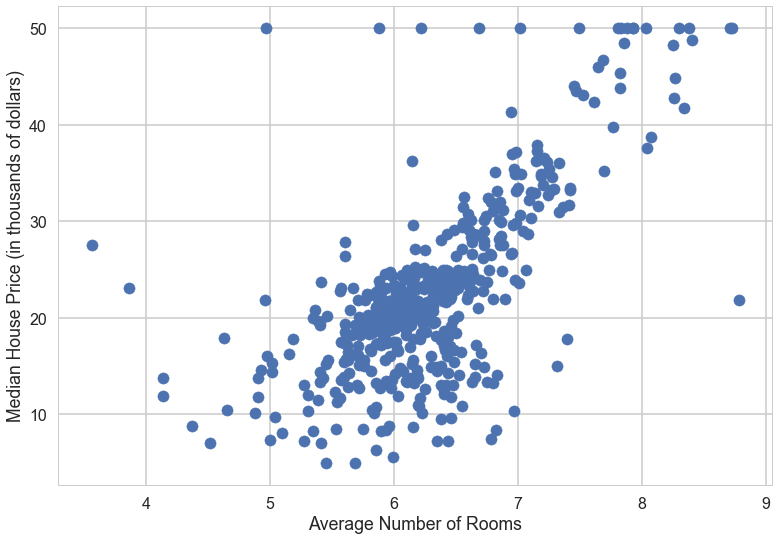

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms")
plt.ylabel("Median House Price (in thousands of dollars)")

<div class="span5 alert alert-success">
**NOTE:** Notice how both axes are clearly labeled using the context of the original dataset. The y axis also includes the appropriate units. Without this, people will be confused as to what 60 represents: the median home price is $60? Oh, no, it is $60,000.

We see that there is generally a positive and fairly strong relationship between the average number of rooms and the media home price. The trend seems strongest in towns with higher average number of rooms (larger) and medians that are higher. We see a few interesting outliers as well. There are two towns whose houses have an average of 3-4 rooms and are priced around the median for all towns. That is, they seem very much above the price we would expect. We also see one town with houses that have an unusually large number of rooms and are priced on average significantly below what we would expect.

**NOTE on Outliers:** When you have domain expertise, or are intimately familiar with the data, it is always a good idea to tell a story about the outliers after finding them in the original data. For example, a real estate agent might know "Oh, those two towns have very small houses but they are in a highly sought-after historical town." 

When doing EDA, we might notice a few odd things as well which triggers a light bulb in our head to do further research. Notice that the *smallest* average house in this data seems to have 3.5 "rooms." Doesn't this seem odd to you? When we think of rooms, we automatically think of bedrooms. Further research may yield that this is the number of *literal* rooms in the house, not just the bedrooms, or just the bathrooms. It could also be the sum of the bedrooms and bathrooms. We need to do further research to be able to tell a good data story.
</div>

<div class="span5 alert alert-success"><h4>SOLUTION: scatter plot between *PTRATIO* and *PRICE*</h4></div>

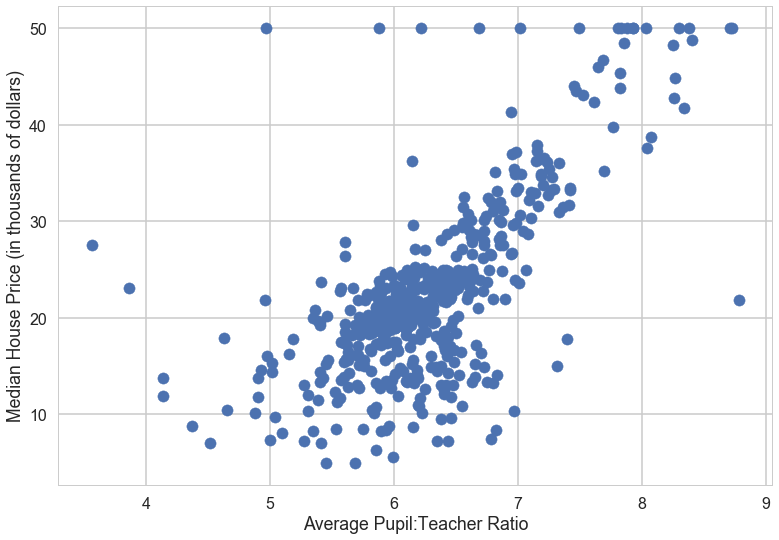

In [14]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Pupil:Teacher Ratio")
plt.ylabel("Median House Price (in thousands of dollars)")

<div class="span5 alert alert-success"><h4>SOLUTION: create some other scatter plots</h4></div>

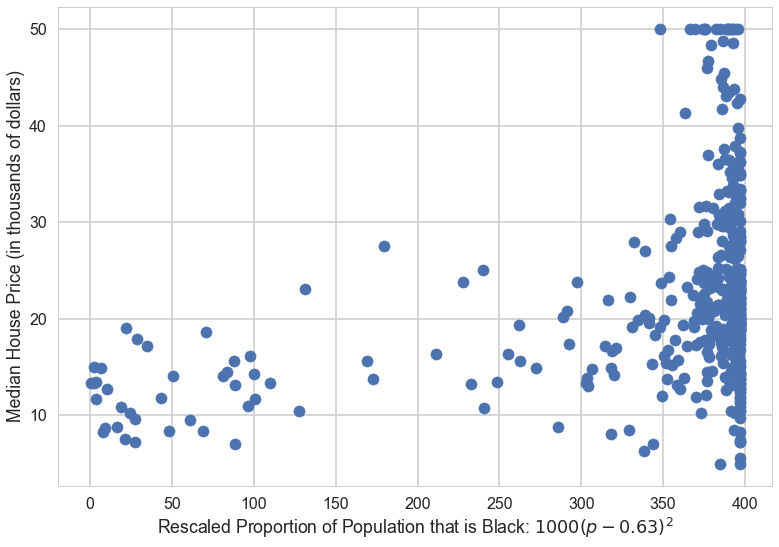

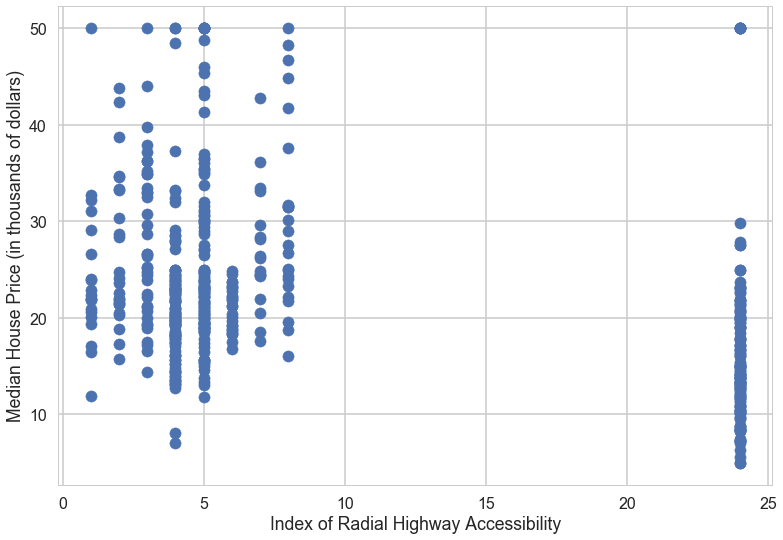

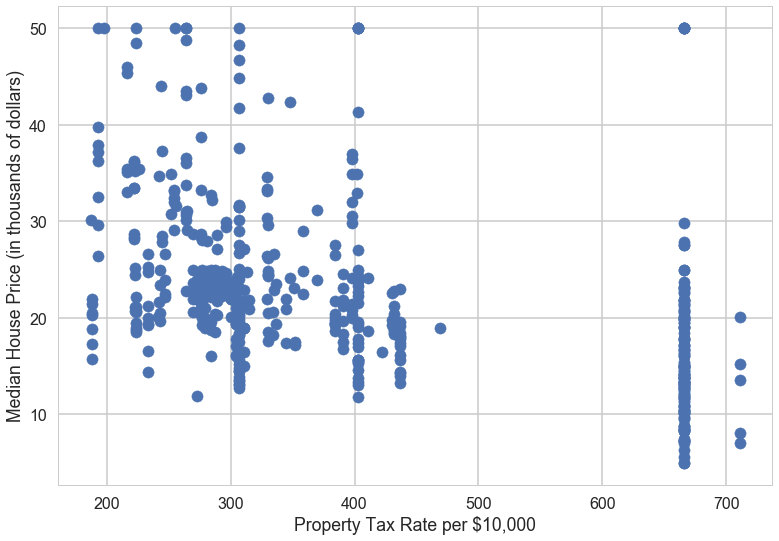

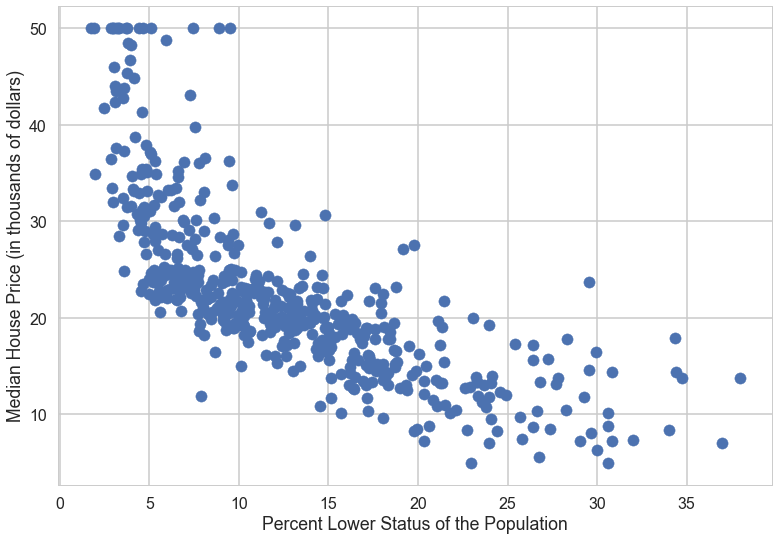

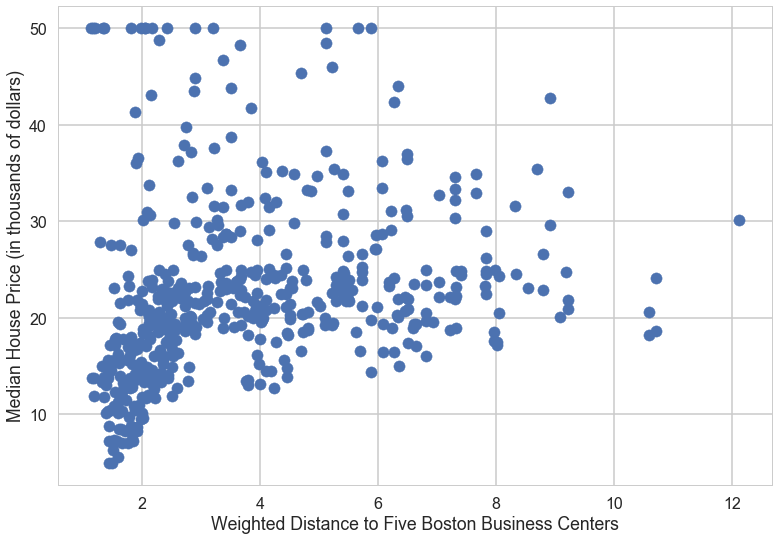

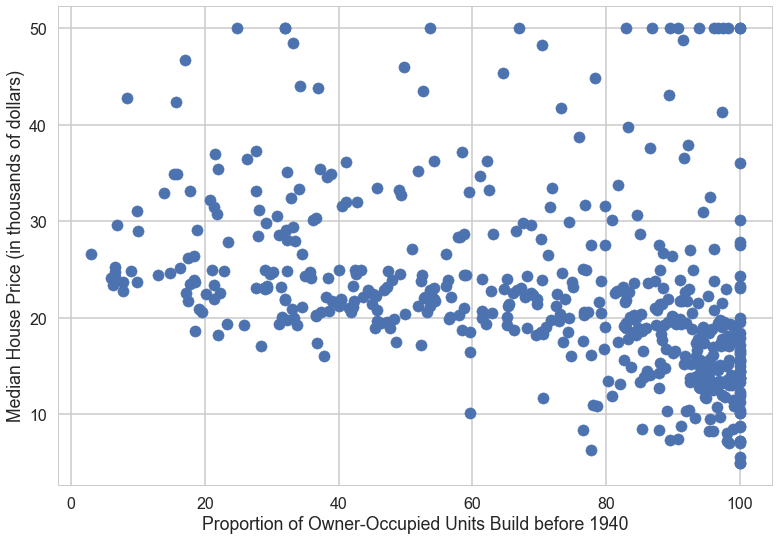

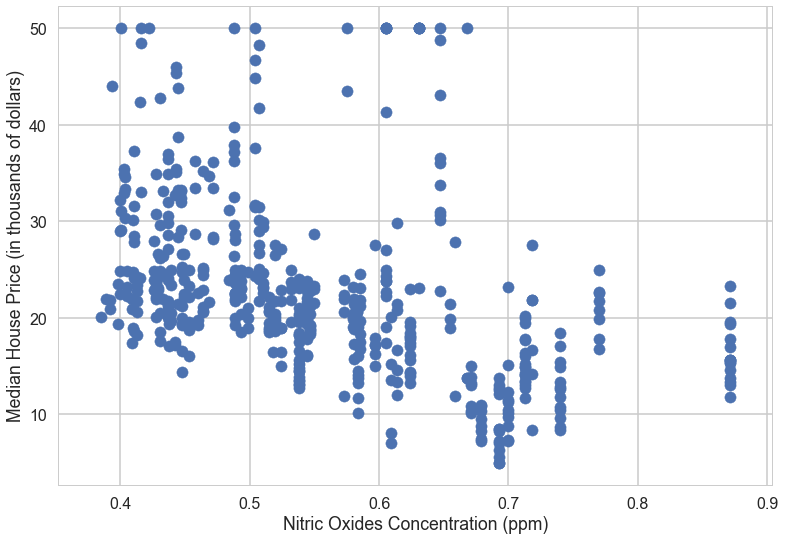

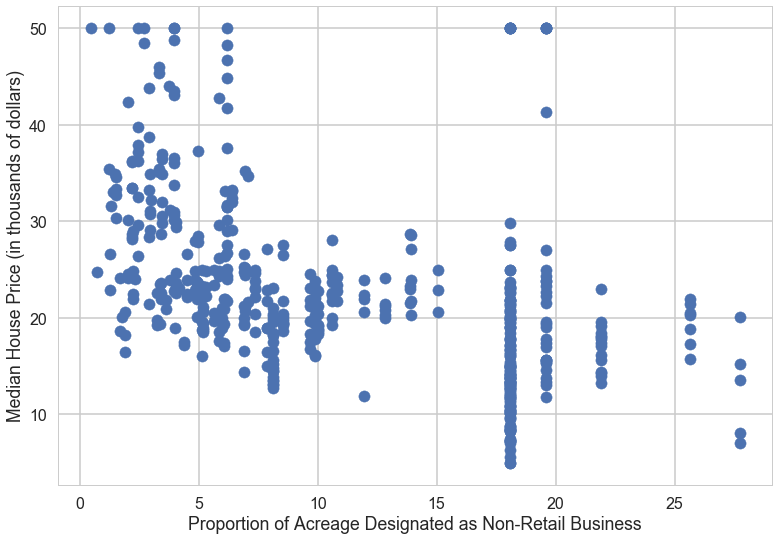

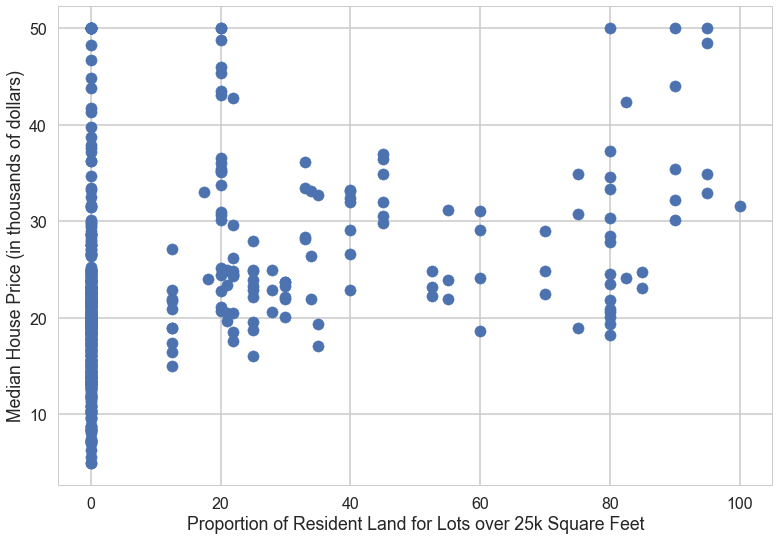

In [15]:
yaxs = "Median House Price (in thousands of dollars)"
variables = [('B', "Rescaled Proportion of Population that is Black: $1000(p - 0.63)^2$"), 
             ('RAD', "Index of Radial Highway Accessibility"),
             ('TAX', "Property Tax Rate per $10,000"), 
             ('LSTAT', 'Percent Lower Status of the Population'),
             ('DIS', "Weighted Distance to Five Boston Business Centers"),
             ('AGE', 'Proportion of Owner-Occupied Units Build before 1940'),
             ('NOX', "Nitric Oxides Concentration (ppm)"),
             ('INDUS', "Proportion of Acreage Designated as Non-Retail Business"),
             ('ZN', "Proportion of Resident Land for Lots over 25k Square Feet")]

for i, var in enumerate(variables, 1):
    plt.figure(i)
    varname, xax = var
    plt.scatter(bos[varname], bos.PRICE)
    plt.xlabel(xax)
    plt.ylabel("Median House Price (in thousands of dollars)")

<div class="span5 alert alert-success">
Responses should be complete sentences and tell a story. The table below shows highlights from each of the scatterplots.

<table>
<th>Variable</th>
<th>Why Interesting</th>
<th>Relationship?</th>
<th>Linear?</th>
<th>Direction?</th>
<th>Strong Relationship?</th>
<th>Outliers/Interesting Features?</th>
<tr>
    <td>B</td>
    <td>Race could potentially be correlated with unobserved variables that are correlated with price.</td>
    <td>Debateable.</td>
    <td>More of less, but can be argued there is non-linearity from 100 to 300. Difficult to tell.</td>
    <td>Weakly positive.</td>
    <td>Moderate</td>
    <td>Non-constant variance due to distribution at 400.</td>
</tr>
<tr>
    <td>RAD</td>
    <td>Homes closer to highways may be less desirable, or more desirable.</td>
    <td>None.</td>
    <td>Worth a try.</td>
    <td>Negative if any.</td>
    <td>No.</td>
    <td>There are effectively two distributions here.</td>
</tr>
<tr>
    <td>TAX</td>
    <td>We would expect that higher taxes are associated with higher priced homes on average.</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>Negative</td>
    <td>Moderate</td>
    <td>One town with unusually high taxes and home values.</td>
</tr>
<tr>
    <td>LSTAT</td>
    <td>Probably a relationship between economic status and home values.</td>
    <td>Yes</td>
    <td>Probably not (more curvilinear), but we might try to fit a line first.</td>
    <td>Negative</td>
    <td>Yes</td>
    <td>None</td>
</tr>
<tr>
    <td>DIS</td>
    <td>Large distances are usually suburbs, but short distances can mean one of two things: desirable since close to work, or undesirable due to crime, poverty etc.</td>
    <td>Yes</td>
    <td>Majorly non-linear.</td>
    <td>Positive</td>
    <td>Strong at low values, weaker at higher values.</td>
    <td>None.</td>
</tr>
<tr>
    <td>AGE</td>
    <td>Areas with older houses can be desirable for historical value, or could be undesirable due to potential poor infrastructure.</td>
    <td>Yes</td>
    <td>Mostly linear. May be non-linear due to higher values. Worth trying a line first.</td>
    <td>Negative</td>
    <td>Weak to moderate.</td>
    <td>Not really.</td>
</tr>
<tr>
    <td>NOX</td>
    <td>Pollution is probably not the first variable most would think of.</td>
    <td>Yes</td>
    <td>Yes</td>
    <td>Negative</td>
    <td>Moderate, outliers at high prices weaken the relationship.</td>
    <td>Series of high prices at all NOX levels.</td>
</tr>
<tr>
    <td>INDUS</td>
    <td>Higher industrial areas are probably not as desirable.</td>
    <td>Yes</td>
    <td>No. Nonlinearity at lower values.</td>
    <td>Negative</td>
    <td>Moderate</td>
    <td>Discretization effect above 15.</td>
</tr>
<tr>
    <td>ZN</td>
    <td>Large residential lots are probably mansions, should have effect.</td>
    <td>Yes</td>
    <td>Could be argued. Would try linear first.</td>
    <td>Positive</td>
    <td>Weak to moderate due to outliers.</td>
    <td>High price outliers at the lower end of ZN and at the highest end of ZN.</td>
</tr>
</table>
</div>

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

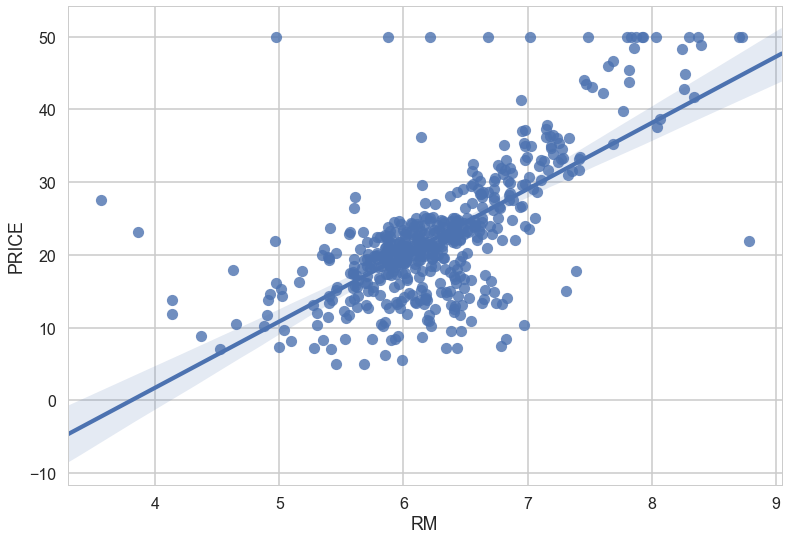

In [16]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


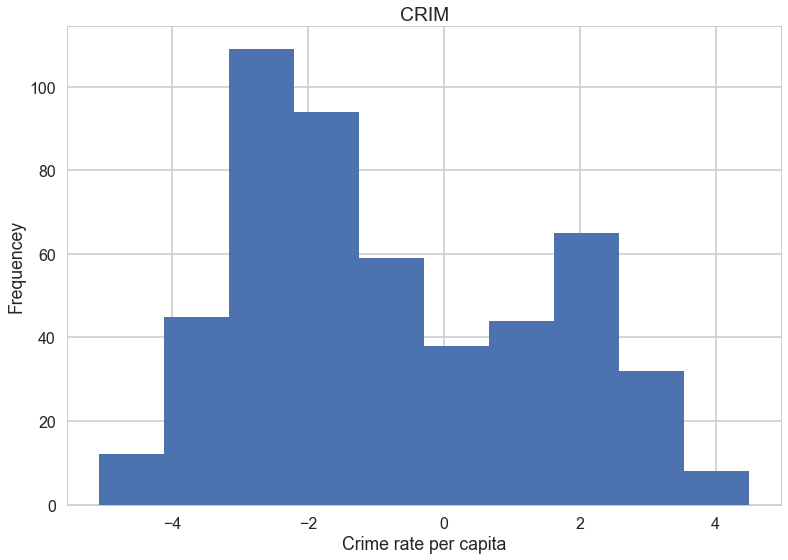

In [17]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

<div class="span5 alert alert-success"><h4>SOLUTIONS: Part 2 Exercise Set II</h4></div>

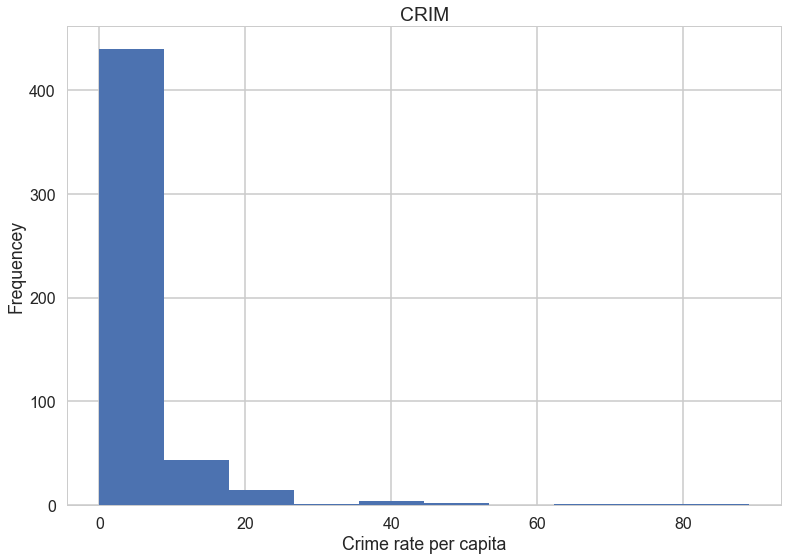

In [18]:
# Histogram without log.
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")

<div class="span5 alert alert-success">
The distribution for CRIM is high skewed to the right. The plot tells us that the data is skewed but little else. When we are faced with such a situation, it can be a good idea to take a log of the data. After taking the log, we see that the data exhibits almost two distributions in one. This may suggest that there are two phenomena within crime rate that contribute to median home price.

In the second exercise, we want to know whether or not the predictors are *correlated*. We do this by plotting the predictors against each other.
</div>

<div class="span5 alert alert-success"><h4>SOLUTION: Correlation among Predictors</h4></div>

/Users/raj/.ml/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116757f10>,
      dtype=object)

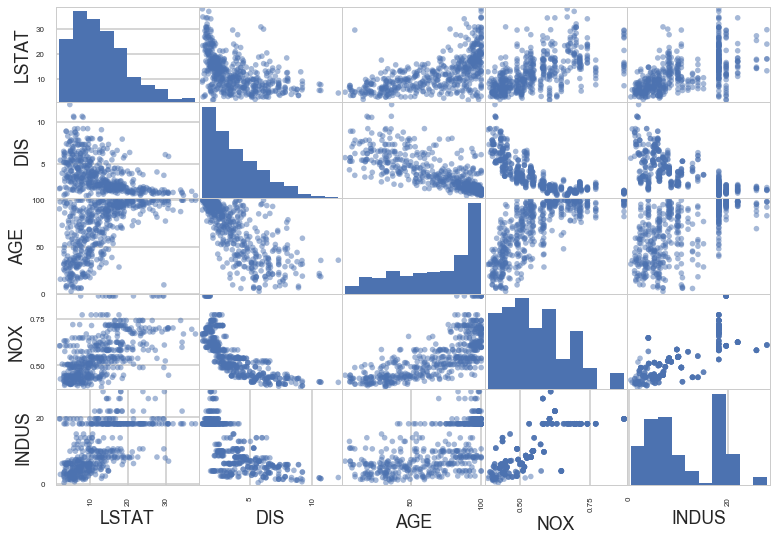

In [19]:
# After looking at all pairs of variables, the following variables were involved in the most intra-predictor correlations:
# LSTAT, DIS, AGE, NOX, INDUS
# So we will only plot those for brevity.
pd.scatter_matrix(bos[['LSTAT', 'DIS', 'AGE', 'NOX', "INDUS"]])

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [20]:
# Import regression modules
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           2.49e-74
Time:                        11:24:27   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

<div class="span5 alert alert-success"><h4>SOLUTIONS: Part 3 Exercise Set I</h4></div>

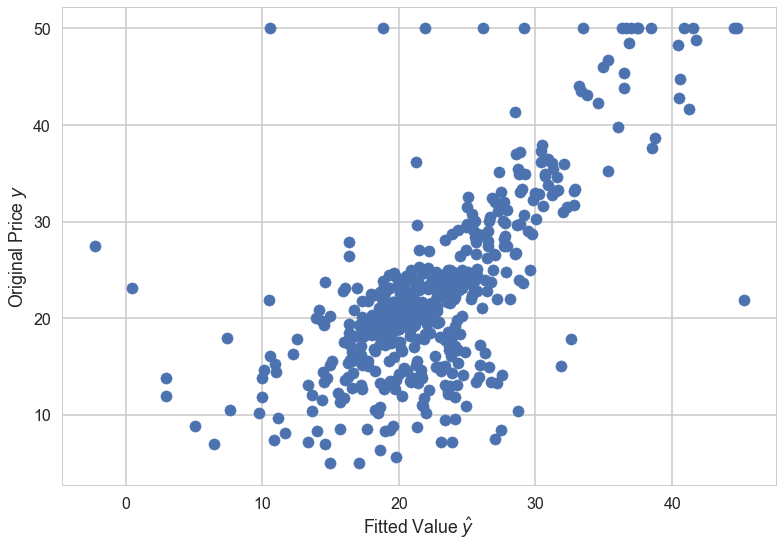

In [22]:
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Fitted Value $\hat{y}$")
plt.ylabel("Original Price $y$")

<div class="span5 alert alert-success">
There is a strong linear relationship between the fitted/predicted values and the original price. There is some evidence of non-constant variance at lower fitted values but we will not worry about it unless our later diagnostic plots show a problem. There are some outliers where the fitted value is quite a bit off from the actual price. In two towns, we predict nonsense median prices around 0 and the other is negative. We have another outlier around predicted median of 45, a town that was way overestimated. We also have several cases where the model underestimated median home values at the highest end of the original price range.

If our model were perfect, all of the points would fall along a straight line.
</div>

### Fitting Linear Regression using `sklearn`


In [23]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [24]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [25]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

/Users/raj/.ml/lib/python2.7/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<div class="span5 alert alert-success">
<h4>SOLUTION: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?</h4>
</div>

In [26]:
# To fit a model without an intercept:
lm_no_intercept = LinearRegression(fit_intercept=False)
no_intercept_sk = lm.fit(X, bos.PRICE)
no_intercept_sm = ols('PRICE ~ RM + ZN + B + LSTAT + DIS + RAD + AGE + NOX + INDUS + CRIM + TAX + PTRATIO - 1',bos).fit()

<div class="span5 alert alert-success">
<h4>SOLUTION: Would you recommend not having an intercept? Why or why not?</h4>

<p>Most models are fit with intercepts. What this means if that if we zero out all of the predictors, we will predict the baseline value of $y$. For example, consider the old SAT myth that one would receive a score of 400 just for putting their name on the answer sheet. If we mark all answers as 0, we get a value of 400. This is the intercept. If in the context of the problem it does not make any logical sense to have such a baseline (positive or negative), we can fit the model without an intercept. For example, if we try to model the relationship between the amount of alcohol consumed, the number of calories consumed that day, and their blood alcohol content (BAC), it does not make sense to fit an intercept. If a person did not drink, and did not consume any calories that day (I wish!), their BAC should be predicted to be zero, not some baseline.</p>

<p>In this model, **we fit an intercept.** We have several variables that can take on the value of 0 yet we expect a non-zero median home price.</p>

<h4>SOLUTION: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</h4>

<p>**NO!** The key is in the phrase *indentically distributed.* The residuals may be normally distributed but that does not mean they all come from a normal distribution *with the same mean and standard deviation.* </p>

<h4>SOLUTION:  True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer</h4>

<p>**False**, though having $Y$ be normally distributed probably helps. The assumption is that the *residuals* are normally distributed, not $Y$.</p>
</div>

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [27]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4911032804


In [28]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [29]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [30]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

<div class="span5 alert alert-success">
<h4>SOLUTION: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</h4>
</div>

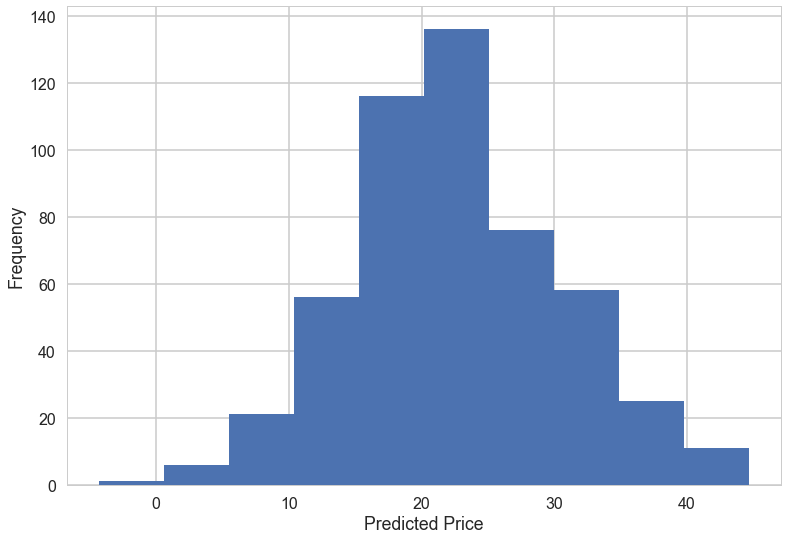

In [31]:
yhat = lm.predict(X)
plt.hist(yhat)
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")

<div class="span5 alert alert-success">
The distribution of the predicted prices looks approximately normally distributed with a mean around \$22000, a spread of about $7,000. There do not appear to be any obvious outliers, though with a smaller bin size, the lowest predictions may indeed be outliers.

<p><h4>SOLUTION: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree</h4></p>
</div>

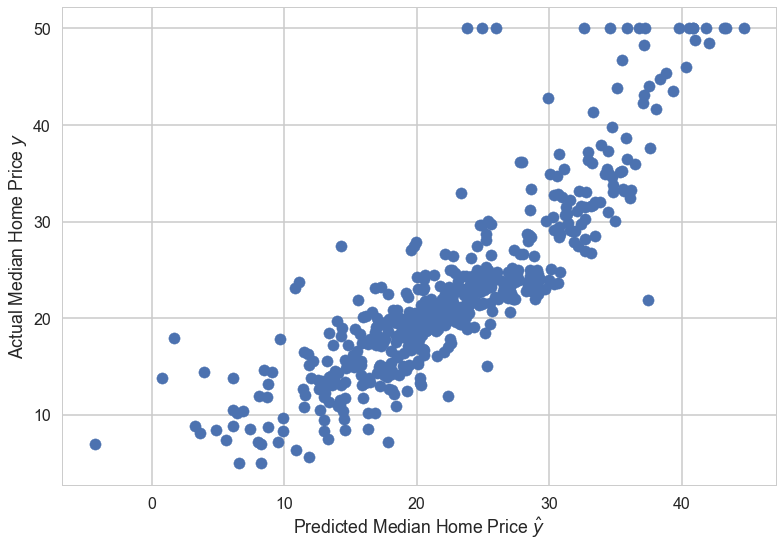

In [32]:
plt.scatter(yhat, bos.PRICE)
plt.xlabel("Predicted Median Home Price $\hat{y}$")
plt.ylabel("Actual Median Home Price $y$")

<div class="span5 alert alert-success">
The predicted values and the original true values fall along a nearly straight line. The variance also looks to be constant.

<h4>SOLUTION: We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</h4>

<p>`statsmodels` provides a lot more information about the model and it is easy to extract this information. `scikit-learn` pretty much just provides the the predicted values and the estimates of the regression coefficients. Computing summary statistics is done automatically in `statsmodels` but must be done by hand in `scikit-learn`. An advantage to `scikit-learn` and disadvantage to `statsmodels` is that `scikit-learn` will just take a matrix of observations whereas `statsmodels` cares about the names of variables. This is a subtle advantage. The main thing a response should include is that `statsmodels` provides summary statistics.</p>
</div>

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [33]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [34]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

5.169878828456423e-24


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price. We already constructed a scatterplot of these two variables.</p> 

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

<div class="span5 alert alert-success">
<h4>SOLUTION: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</h4>
</div>

In [35]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())
r2 = m.rsquared_adj
f = m.f_pvalue

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.61e-34
Time:                        11:24:50   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-success">
<h4>SOLUTION: Interpret the intercept and the coefficients.</h4>

<p>Pupil to teacher ratio is statistically significant since its p-value is less than 0.05. This means it has a significant effect on median house price in a town. It has a coefficient estimate of -2.18 which means that on average, an addition of one student per teacher to the average ratio is associated on average with a decrease of $2180 in median house price in a town.</p>

<p>The intercept has a p-value less than 0.05 and is thus statistically significant. It has a coefficient of 62.34 which means that if pupil-to-teacher were 0, the average median home price would be $6234. Having a value of 0 on `PTRATIO` does not make much sense, but that is how the intercept would be interpreted. While we usually discuss the intercept in a report, it probably would not make much sense here. On the other hand, it does not make sense to remove the intercept from the model because if there weren't any children in the town (and thus a `PTRATIO` of 0), the median house price would definitely not be 0.</p>

<h4>SOLUTION: Calculate (or extract) the $R^2$ value. What does it tell you?</h4>

<p>The $R^2$ value of 0.258 tells us that about 26\% of the variance in median house price in a town can be explained by pupil to teacher ratio.</p>

<h4>SOLUTION: Compute the $F$-statistic. What does it tell you?</h4>

<p>The $F$-statistic value of 175.1 is associated with a p-value of $1.61 \times 10^{-34} \approx 0$. We reject the null hypothesis that the beta coefficient(s) are (all) equal to zero. At least one of the variables in the model is significant.</p>

<h4>SOLUTION: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice?</h4>

$$F = 175.1, t = -13.233$$

$$F = 175.1 = (-13.233)^2 = t^2$$

$$F = t^2$$

<p>Again, it is important to note that this relationship ONLY holds for simple linear regression.</p>

</div>

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [36]:
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())
r2 = m.rsquared_adj
f = m.f_pvalue

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.09e-97
Time:                        11:24:52   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

<div class="span5 alert alert-success">
<h4>SOLUTION</h4>

<p>The $F$-statistic has a p-value of practically 0, which means that the model is statistically significant -- there is at least one variable in the model that is statistically significant -- there is at least one $\beta$ coefficient that is non-zero. If the p-value were greater than 0.05, we would stop because the model is not statistically significant.</p>

<p>The $R^2$ value of 0.591 means that about 59\% of the variance in median house price can be explained by the crime rate, average number of rooms and pupil-to-teacher ratio.</p>

<p>All of the variables have p-values less than 0.05, so each of them contributes to the median house price. The coefficient of -1.1 for pupil-teacher-ratio means that every student added to the pupil-to-teacher ratio for a town is associated on average with a decrease of \$1100 in median house price in a town. Note that this value is *different* from the previous analysis. What this suggests is that in the original model with only `PTRATIO`, `PTRATIO` was masking some of the variance for which the other variables are responsible.</p>

<p>The coefficient for average number of rooms is 7.382. This means that increasing the average number of rooms in a dwelling by one is associated with, on average, a \$7382 increase in the median house price.</p>

<p>The coefficient for crime rate is -0.202. This means that a one-unit increase (1%) in a per-capital crime rate is associated with a decrease of \$202 in the median house price of a town.</p>

<p>Now look at the intercept. This is weird. The intercept is -3.31. If this value were significant, it would mean that a town with no students, no rooms and no crime would have an average home price of -$3310 which does not make sense. Since the intercept is not statistically significant, we cannot really make an inference about it. This does not, however, suggest that we should remove the intercept because, for example, just because a town has zero crime, that does not mean the median home price should also be zero. *The intercept not being significant is pretty unusual.* Usually centering the predictors will help.</p>
</div>

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

<div class="span5 alert alert-success">
<h4>SOLUTION: Part 4 Exercises</h4>
</div>

In [37]:
# Due to multicollinearity, many variables were dropped.

mymodel = ols('PRICE ~ RM + CRIM + PTRATIO + INDUS', bos).fit()
print(mymodel.summary())

# AIC
aic_my = mymodel.aic
aic_original = m.aic
print("AIC for my larger model: {}".format(aic_my))
print("AIC for the original model with 3 vars: {}".format(aic_original))
print("The larger model is better." if aic_my < aic_original else "The reduced model is better.")

# F-test
anova = statsmodels.stats.anova.anova_lm(m, mymodel, typ="I")
_, pval = anova['Pr(>F)']
_, F = anova['F']
print("F-value: {}".format(F))
print("p-value for F-test: {}".format(pval))
print("The full model is significantly different." if pval < 0.05 else "Both models are the same>")

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     191.7
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.53e-99
Time:                        11:24:55   Log-Likelihood:                -1605.4
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     501   BIC:                             3242.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9880      4.032     -0.245      0.8

/Users/raj/.ml/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/raj/.ml/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/raj/.ml/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<div class="span5 alert alert-success">
The AIC for the full model containing 4 variables is lower than the AIC for the reduced model of 3 variables. The model containing 4 variables is better. The F-test suggests that both models are not the same.
</div>


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

<div class="span5 alert alert-success">
<h4>SOLUTIONS: Part 5 Exercises</h4>
    </div>

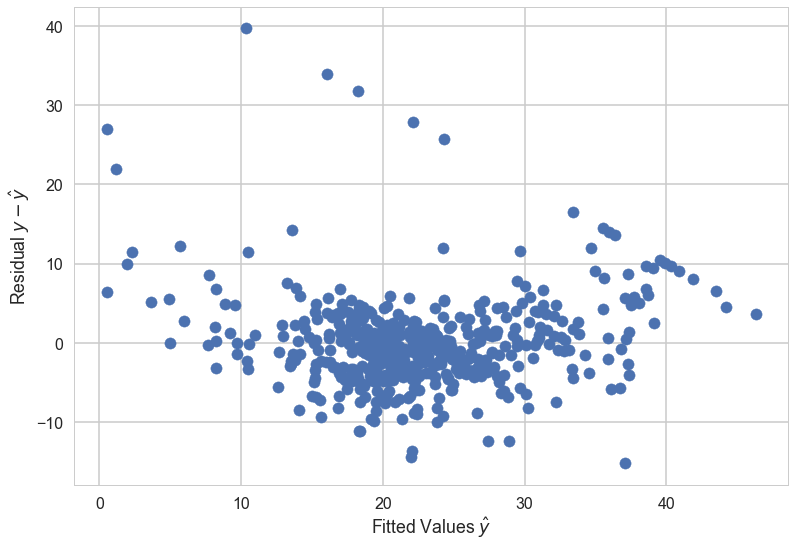

In [38]:
#### SOLUTIONS Answers will vary.

# Residuals vs fitted plot.
plt.scatter(mymodel.fittedvalues, mymodel.resid)
plt.xlabel("Fitted Values $\hat{y}$")
plt.ylabel("Residual $y - \hat{y}$")

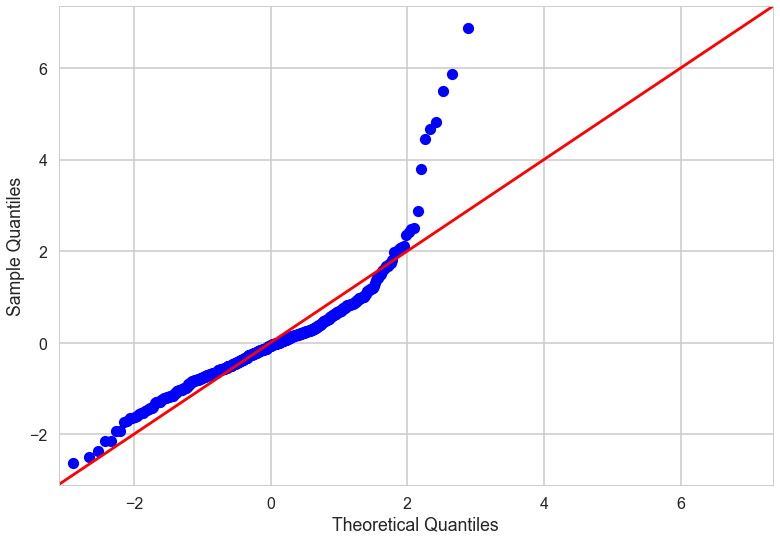

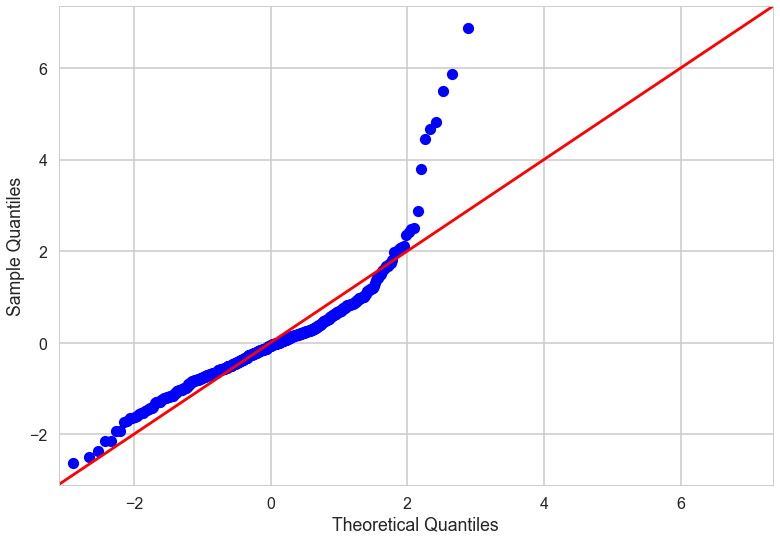

In [39]:
# Quantile plot of residuals
resid = mymodel.resid
mean = np.mean(resid)
sd = np.std(resid)
z = (resid - mean) / sd
sm.qqplot(z, line='45')

(array([  9.,  78., 261., 123.,  23.,   5.,   1.,   3.,   2.,   1.]),
 array([-15.15407638,  -9.6694665 ,  -4.18485662,   1.29975326,
          6.78436314,  12.26897302,  17.75358289,  23.23819277,
         28.72280265,  34.20741253,  39.69202241]),
 <a list of 10 Patch objects>)

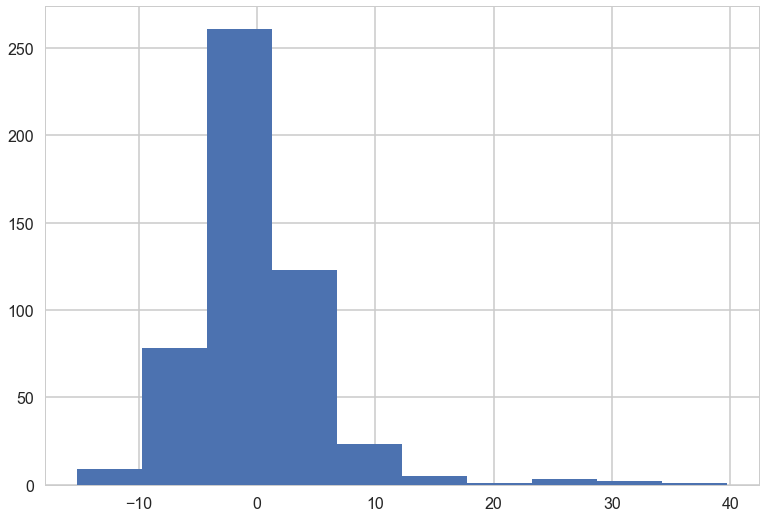

In [40]:
plt.hist(resid)

<div class="span5 alert alert-success">
<h4>SOLUTION: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions? Construct a quantile plot of the residuals. What does the plot tell you? What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</h4>

<p>The residuals vs. fitted plot shows more or less a blob without a trend. This is what we want. Note the diagonal line going through the plot. This is a ceiling effect from the capped housing prices at 50. Note that the largest residuals occur at the lower end of the range for fitted values. Our model does not perform great here, but no violations of the assumptions. The variance also appears to be constant, so again no violations.</p>

<p>The quantile plot more or less follows a straight line, but starts to veer off at higher values. It is not uncommon to see this behavior in the tails of the data. This could be due to outliers, or due to the ceiling effect. Since the bulk of the residual quantiles lie along the line, we will conclude that the residuals are still normally distributed.</p>

<p>The advantage of the residual vs fitted plot is that it is easy to draw conclusions from because all we are looking for is a random blob. Additionally, it helps us diagnose issues with our model such as outliers, correlated errors, nonlinearity etc. On the downside, it can sometimes be difficult to tell whether or not the blob is in fact random, especially after looking at several of these.  Additionally, the reason we are looking for a blob is because the contour of the normal distribution in two dimensions is essentially a blob. Other distributions are not nearly as easy to spot.</p>

<p>The quantile plot does not convey as much information but allows us to quickly determine whether or not the distributions is normal, just look for a line. Unfortunately, weird behaviors in the tail (very common) can make our determination difficult. An advantage of the quantile plot over the fitted vs residual plot is that we can use it to test for any distribution. All we need is the quantiles/percentiles of our data, and a way to generate the quantiles for the distribution we want to compare to.</p>

<h4> SOLUTION: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</h4>

<p>Answers will vary.</p>

<h4> SOLUTION: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</h4>

<p>Answers will vary.</p>

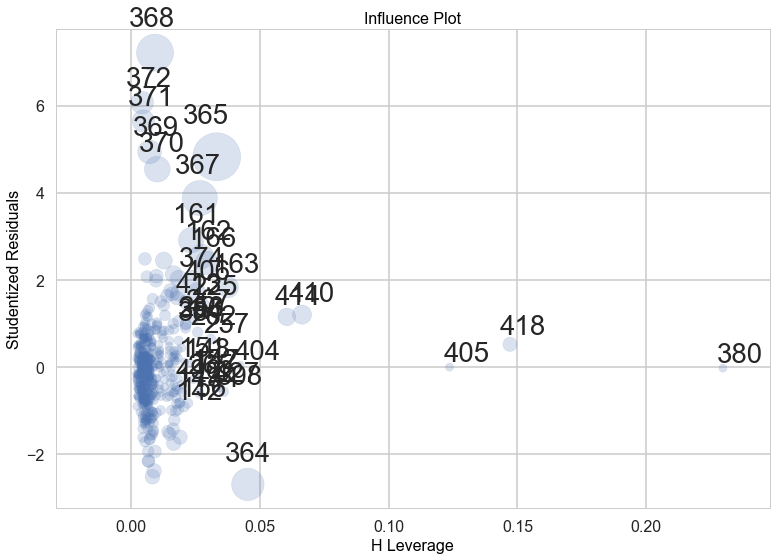

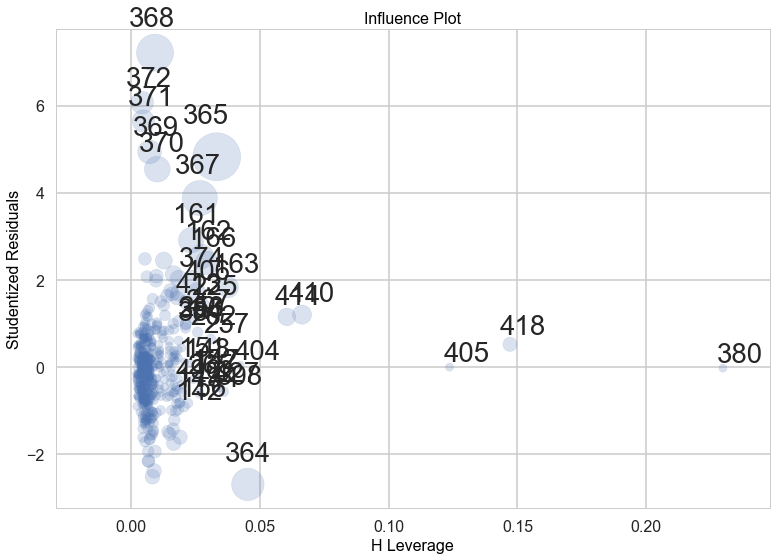

In [41]:
import statsmodels.graphics.regressionplots as plots

plots.influence_plot(mymodel, alpha=0.01, plot_alpha=0.2, fontsize="small")

<div class="span5 alert alert-success">
<h4>SOLUTION: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</h4>
</div>

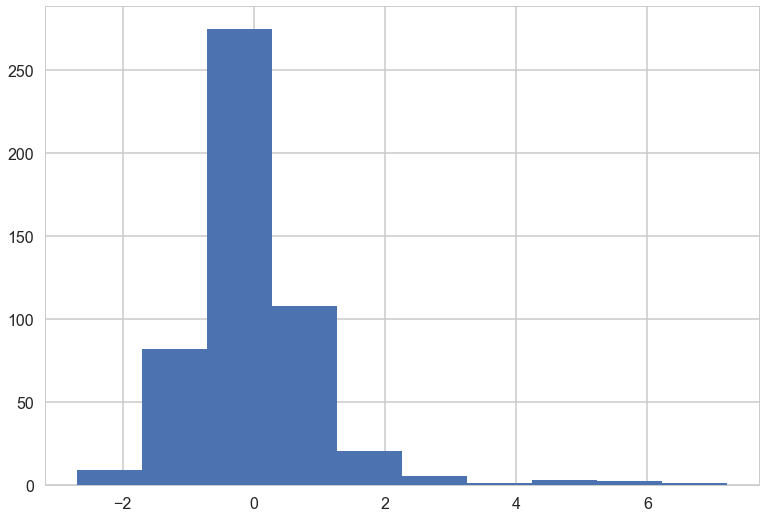

In [42]:
# From the plot, it looks like H leverage > 0.05 are points I want to remove. Note that 0.05 has nothing to do with
# alpha, this is just a coincidence.
high_leverage_points = np.where(mymodel.get_influence().hat_matrix_diag > 0.05)
plt.hist(mymodel.get_influence().resid_studentized_external)
# Based on the histogram of the studentized residuals, I'll also remove any residuals that are greater than 3.
# Because the residuals are standardized, they are on the same scale as z-scores.
high_studentized_resid = np.where(mymodel.get_influence().resid_studentized_external > 3)
remove = np.concatenate([high_leverage_points[0], high_studentized_resid[0]])

In [43]:
no_outliers = ols('PRICE ~ RM + CRIM + PTRATIO + INDUS', newbos).fit()

NameError: name 'newbos' is not defined

<div class="span5 alert alert-success">
Answers will vary but here are some things to check:
    <ul>
    <li> The $R^2$ may (or may not) increase with the influential points removed.
    <li> The AIC may drop.
    <li> The residuals vs fitted plot may not show as many outliers.
    <li> The quantile plot may follow the straight line more closely.
    </ul>
    </div>